<a href="https://colab.research.google.com/github/lukmanprasetyo/H8_KS009/blob/master/Tugas_pytn_ks09_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Nama : Lukman Prasetyo Nugroho
Absensi : 004
Alasan telat: Terkendala di perangkat (rusak) telah disampaikan ke mentor

# **Bank Marketing Data Set**

Intruksi \
* Bersihkan dan preproses Dataset Kamu
* Bangun Model Menggunakan Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree dan Random Forest
* Pilih 1 algoritma yang kamu anggap paling sesuai lalu jelaskan mengapa
* Kumpulkan Informasi melalui analisi kamu

**Nama** : Lukman Prasetyo Nugroho \
**Absensi** : 004 \
Alasan telat: Terkendala di perangkat (rusak) telah disampaikan ke mentor


In [106]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
dataset_url = "https://raw.githubusercontent.com/lukmanprasetyo/H8_KS009/master/bank.csv"

In [11]:
bank = pd.read_csv(dataset_url, delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# **Data Cleaning dan Preproses Dataset**

Melihat bentuk dan Informasi dari data

In [12]:
bank.shape

(4521, 17)

Terdapat 4521 baris dan 17 kolom dari dataset Bank Marketing. Selanjutnya cek jumlah data, beserta tipe data yang digunakan.

In [ ]:
col_list = bank.columns[bank.dtypes == 'object'].to_list()
for col in col_list:
    bank[col] = bank[col].astype('category')
bank.info()

In [88]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


Setelah melihat kolom yang tersedia, serta type data yang digunakan. Langkah selanjutnya melihat apakah ada kolom yang kosong. Maksudnya missing value dari data

In [14]:
bank.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Terlihat, didalam data tersebut. Tidak ada yang kosong
Selanjutnya cek apakah ada kolom yang kosong, untuk memastikan

In [15]:
bank.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak ada data yang kosong, selanjutnya ke langkah kedua yaitu proses analisa

# **Analisa Pekerjaan dan Saldo**

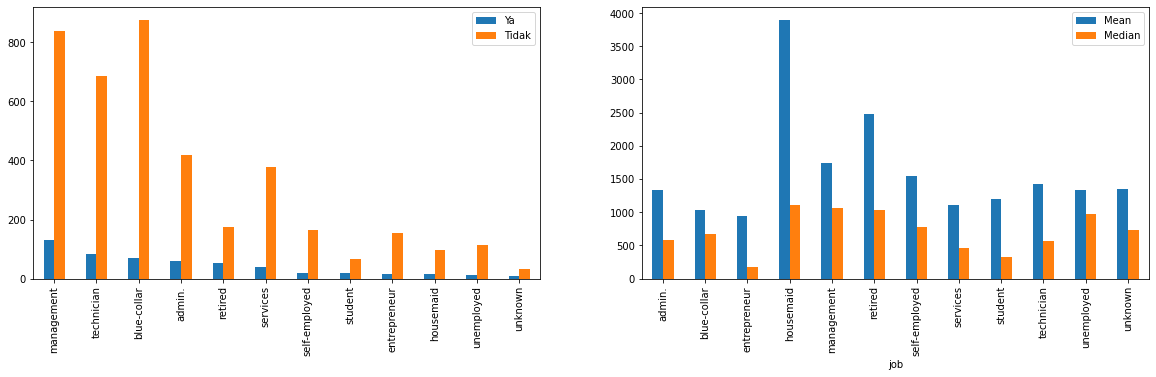

In [35]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

job = pd.DataFrame()
job['Ya'] = bank[bank['y'] == 'yes']['job'].value_counts()
job['Tidak'] = bank[bank['y'] == 'no']['job'].value_counts()
job.plot(kind='bar', ax=ax0)

jobsaldo = bank[bank['y'] == 'yes']
jobsaldo = jobsaldo.pivot_table(
    index='job',
    values='balance',
    aggfunc=[np.mean, np.median]
)
jobsaldo.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['Mean', 'Median'])

**Kesimpulan**

1.   Pekerjaan yang paling banyak di terima pinjamannya, yaitu Management
2. Pekerjaan yang paling banyak ditolak blue collar
3. Berdasarkan rata rata, jumlah tabungan housemaid mempunyai saldo paling besar diantara yang lain
4. Tabungan median terbesar Housemaid



# **Analisa Pekerjaan,  Saldo**

Menggunakan Pie Chart, untuk melihat presentasi pekerjaan para nasabah bank

(-1.1085457030296828,
 1.1004069383474275,
 -1.1037482980929396,
 1.1254509178639913)

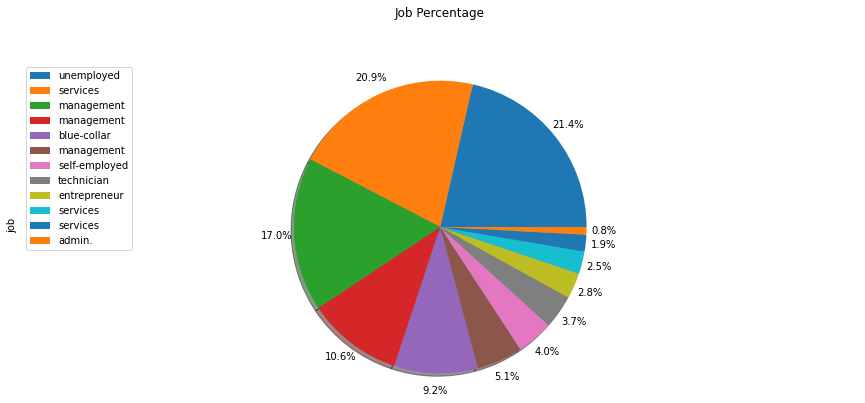

In [68]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

bank['job'].value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', shadow=True, labels=None, pctdistance=1.12 )
plt.legend(labels=bank['job'], loc='upper left')
plt.title('Job Percentage', y=1.12)
plt.axis('equal')


(-1.1003718150294786,
 1.1000177054809666,
 -1.1002769820857374,
 1.1006051976517777)

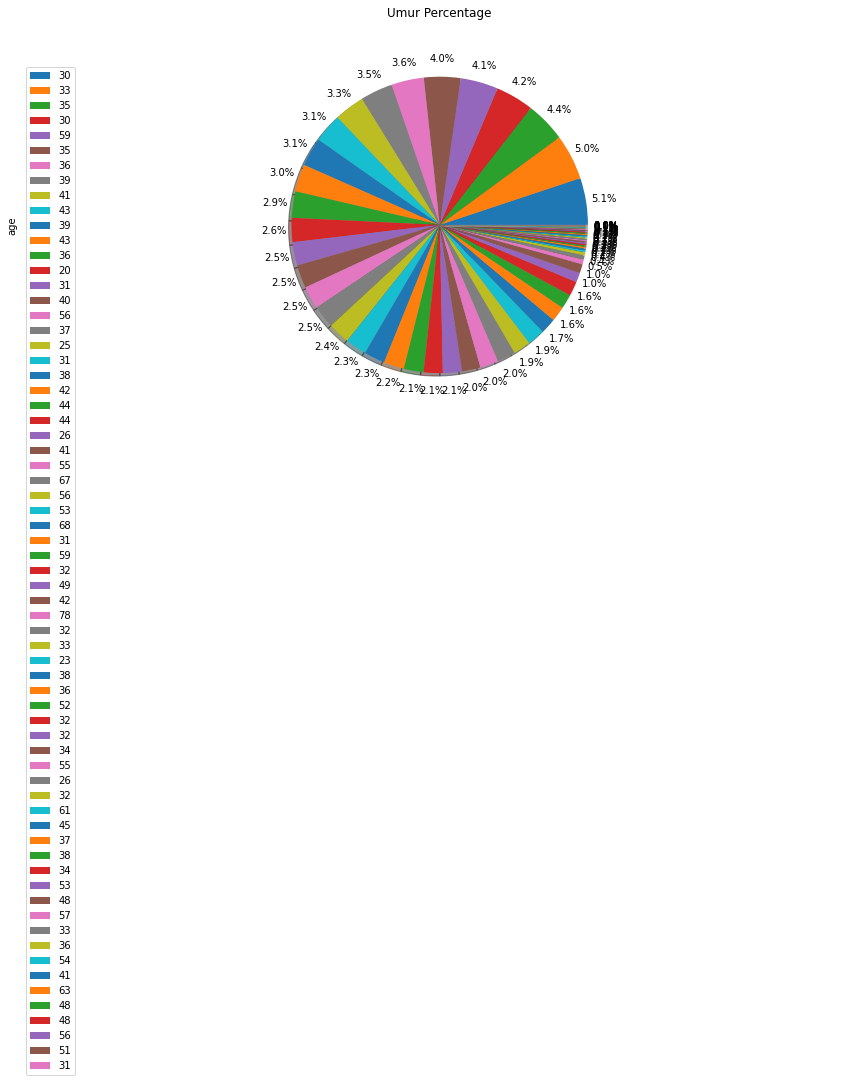

In [69]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

bank['age'].value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', shadow=True, labels=None, pctdistance=1.12 )
plt.legend(labels=bank['age'], loc='upper left')
plt.title('Umur Percentage', y=1.12)
plt.axis('equal')

**Kesimpulan**

1. Dari data bank tersebut diketahui Unemployed memiliki presentase terbesar
2. Presentase admin menjadi yang paling rendah
3. Berdasarkan umur, presentase terbesar ada di umur 30 tahun



# **Analisa Pekerjaan, dengan Pernikahan**

Melihat hubungan antara pekerjaan dengan pernikahan

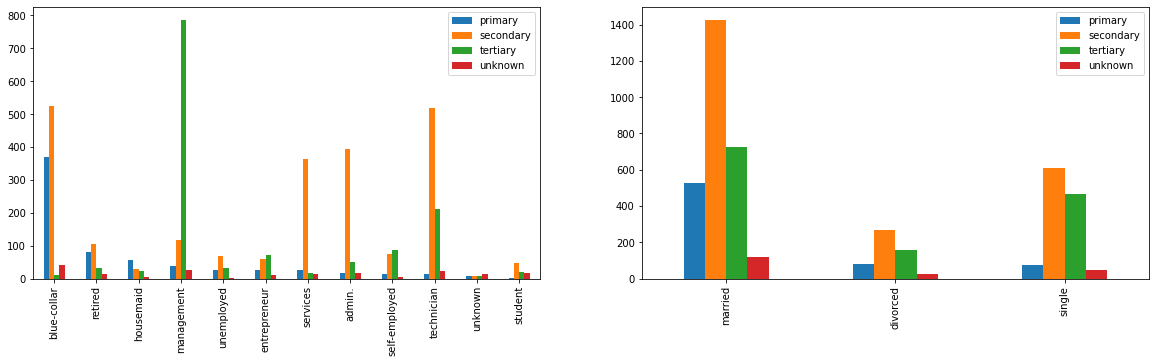

In [74]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

edulist = list(bank['education'].unique())

edujob = pd.DataFrame()
for edu in edulist:
    edujob[edu] = bank[bank['education'] == edu]['job'].value_counts()
edujob.plot(kind='bar', ax=ax0)

edumarital = pd.DataFrame()
for edu in edulist:
    edumarital[edu] = bank[bank['education'] == edu]['marital'].value_counts()
edumarital.plot(kind='bar', ax=ax1, figsize=(20, 5))

**Kesimpulan**

1. Dari data bank tersebut diketahui management memiliki presentase terbesar telah menyelesaikan pendidikan
2. Blue-collar dan techinian mempunyai presentase yang besar telah menyelesaikan pendidikan secondary
3. Telah menikah, mempunyai presentasi terbesar menyelesaikan secondary dalam pendidikan




# **Correlation**

Melihat hubungan antar kolom

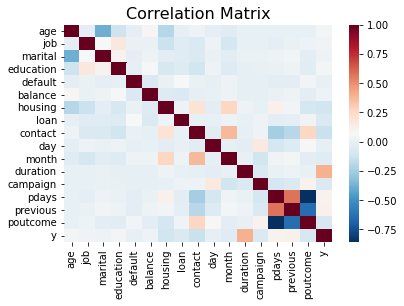

<Figure size 1440x1440 with 0 Axes>

In [108]:
col_list = bank.columns[bank.dtypes == 'category'].to_list()
for col in col_list:
    bank[col] = preprocessing.LabelEncoder().fit_transform(bank[col])

x = bank.iloc[:, 0:16]
y = bank.iloc[:, -1]

corrmat = bank.corr()
sns.heatmap(bank[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

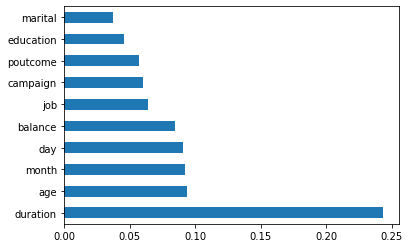

In [109]:
model = ExtraTreesClassifier()
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Diketahui jika duration paling mempengaruhi, apabila dibandingkan dengan kolom lainnya

# **Logistic Regression**

Selanjutnya melakukan permodelan dengan Logistic Regression

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [115]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [116]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8739867354458364 

Confusion Matrix :
 [[1155   35]
 [ 136   31]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1190
           1       0.47      0.19      0.27       167

    accuracy                           0.87      1357
   macro avg       0.68      0.58      0.60      1357
weighted avg       0.84      0.87      0.85      1357



# **K-Nearest Neighbors**

Selanjutnya melakukan permodelan dengan K-Nearest Neighbors

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [117]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [119]:
print("Akurasi Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Akurasi Score : 0.871039056742815 

Confusion Matrix :
 [[1149   41]
 [ 134   33]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1190
           1       0.45      0.20      0.27       167

    accuracy                           0.87      1357
   macro avg       0.67      0.58      0.60      1357
weighted avg       0.84      0.87      0.85      1357



# **SVM**

Selanjutnya melakukan permodelan dengan SVM

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [120]:
print("Akurasi Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Akurasi Score : 0.871039056742815 

Confusion Matrix :
 [[1149   41]
 [ 134   33]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1190
           1       0.45      0.20      0.27       167

    accuracy                           0.87      1357
   macro avg       0.67      0.58      0.60      1357
weighted avg       0.84      0.87      0.85      1357



# **Decision Tree**

Selanjutnya melakukan permodelan dengan Decision Tree

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [128]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [130]:
print("Akurasi Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Akurasi Score : 0.8621960206337509 

Confusion Matrix :
 [[1099   91]
 [  96   71]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.44      0.43      0.43       167

    accuracy                           0.86      1357
   macro avg       0.68      0.67      0.68      1357
weighted avg       0.86      0.86      0.86      1357



# **Random Forest**

Selanjutnya melakukan permodelan dengan Random Forest

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [127]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [131]:
print("Akurasi Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Akurasi Score : 0.8621960206337509 

Confusion Matrix :
 [[1099   91]
 [  96   71]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.44      0.43      0.43       167

    accuracy                           0.86      1357
   macro avg       0.68      0.67      0.68      1357
weighted avg       0.86      0.86      0.86      1357



# **Naive Bayes**

Selanjutnya melakukan permodelan dengan Naive Bayes

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [133]:
model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [ ]:
print("Akurasi Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Akurasi Score : 0.8621960206337509 

Confusion Matrix :
 [[1099   91]
 [  96   71]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.44      0.43      0.43       167

    accuracy                           0.86      1357
   macro avg       0.68      0.67      0.68      1357
weighted avg       0.86      0.86      0.86      1357



**Kesimpulan**

Bardasarkan perhitungan serta permodelan yang telah dilakukan, tingkat nilai akurasi terbaik yaitu dengan menggunakan algoritma Random Forest. Tingkat nilai akurasi terendah dengan menggunakan algoritma Naive Bayes.